In [2]:
import pandas as pd

In [3]:
# 銘柄の情報を取得する

def get_brands():
    brands_sheet_url = f"https://www.jpx.co.jp/markets/statistics-equities/misc/tvdivq0000001vg2-att/data_j.xls"
    # ["日付", "コード", "銘柄名", "市場・商品区分", "33業種コード", "33業種区分", "17業種コード", "17業種区分", "規模コード", "規模区分"]
    return pd.read_excel(brands_sheet_url)
brands_df = get_brands()
brands_df.rename({'銘柄名': 'name', 'コード': "code", "市場・商品区分": "market"}, axis=1, inplace=True)
brands_df["sector"] = brands_df["33業種区分"] + brands_df["17業種区分"]



In [6]:
brands_df["market"].unique()

array(['プライム（内国株式）', 'ETF・ETN', 'スタンダード（内国株式）', 'グロース（内国株式）',
       'PRO Market', 'プライム（外国株式）', 'REIT・ベンチャーファンド・カントリーファンド・インフラファンド',
       'スタンダード（外国株式）', 'グロース（外国株式）', '出資証券'], dtype=object)

In [19]:
target_markets = [
    "プライム（内国株式）", 'スタンダード（内国株式）', 'グロース（内国株式）',
    'REIT・ベンチャーファンド・カントリーファンド・インフラファンド'
]
with open("code_list", "w") as f:
    list_ = brands_df.loc[brands_df["market"].isin(target_markets), "code"].to_list()
    f.writelines("/n".join(map(str, list_)))

In [8]:
brands_df[brands_df["market"] == 'グロース（外国株式）']

,日付,code,name,market,33業種コード,33業種区分,17業種コード,17業種区分,規模コード,規模区分,sector
2668,20221031,6697,テックポイント・インク ＪＤＲ,グロース（外国株式）,3650,電気機器,9,電機・精密,-,-,電気機器電機・精密
3232,20221031,7699,オムニ・プラス・システム・リミテッド ＪＤＲ,グロース（外国株式）,6050,卸売業,13,商社・卸売,-,-,卸売業商社・卸売
3885,20221031,9257,ＹＣＰホールディングス（グローバル）リミテッド ＪＤＲ,グロース（外国株式）,9050,サービス業,10,情報通信・サービスその他,-,-,サービス業情報通信・サービスその他


In [3]:
from pathlib import Path

In [4]:
# data を退避させる（現時点では一つにまとめる）

In [5]:
output_dir = Path("./kessan/output")

In [6]:
len(list(Path("./kessan/output").glob("*.xlsx")))

3233

In [8]:
filepath = next(iter(Path("./kessan/output").glob("*.xlsx")))

kessan_list = []
for filepath in output_dir.glob("*.xlsx"):
    funda_info = pd.read_excel(filepath).to_dict()
    filepath=str(filepath).split("/")[-1]
    kessan_list.append({
     "filepath": filepath,
     "funda_info":funda_info
    })
    
    

In [9]:
import datetime as dt
today_str = dt.date.today().strftime("%Y-%m-%d")

In [14]:
import json
json.dump(kessan_list, open(str(output_dir / f"data_by_{today_str}.json"), "w+"))
# kessan_list

In [17]:
for file in output_dir.glob("*.json"):
    print(file)
pd.read_json("kessan/output/data_by_2022-11-19.json")

kessan/output/data_by_2022-11-17.json
kessan/output/data_by_2022-11-19.json


,filepath,funda_info
0,20221114_1934.xlsx,"{'決算期': {'0': '20.04-09', '1': '21.04-09', '2'..."
1,20221114_3909.xlsx,"{'決算期': {'0': '20.01-09', '1': '21.01-09', '2'..."
2,20221114_7419.xlsx,"{'決算期': {'0': '20.04-09', '1': '21.04-09', '2'..."
3,20221114_5074.xlsx,"{'決算期': {'0': '21.07-09', '1': '22.07-09', '2'..."
4,20221114_9407.xlsx,"{'決算期': {'0': '20.04-09', '1': '21.04-09', '2'..."
...,...,...
3228,20221114_2819.xlsx,"{'決算期': {'0': '20.04-09', '1': '21.04-09', '2'..."
3229,20221114_4534.xlsx,"{'決算期': {'0': '20.04-09', '1': '21.04-09', '2'..."
3230,20221114_8844.xlsx,"{'決算期': {'0': '20.04-09', '1': '21.04-09', '2'..."
3231,20221114_7318.xlsx,"{'決算期': {'0': '21.04-09', '1': '22.04-09', '2'..."


In [37]:
# dict_list/

In [20]:
# !rm {str(output_dir)}/*.xlsx

In [50]:
out = []
for file in output_dir.glob("*.json"):
    print(file)
    dict_list = json.load(open(file, 'r+'))
    for dic in dict_list:
        try:
            code = dic["filepath"].split(".")[0].split("_")[-1]
            kessan_dict = dic.get("funda_info") or dic.get("kessan_dict")
            df = pd.DataFrame(kessan_dict)
            duration = df.iloc[-2]["決算期"]
            release_date = df.iloc[-2]["発表日"]
            profit = df.iloc[-1]["営業益"]
            name = brands_df.set_index("code")["name"].get(int(code))
            out.append({
                "name":name,
                "profit_growth_rate": profit,
                "code": code,
                "release_date": release_date,
                "duration": duration
            })
        except: 
            print(dic)


kessan/output/data_by_2022-11-17.json
kessan/output/data_by_2022-11-19.json
{'filepath': '20221114_7177.xlsx', 'funda_info': {'決算期': {'0': '旧\xa022.07-12', '1': '新\xa022.07-12', '2': '修正額'}, '１株配': {'0': '－', '1': '0', '2': '0'}, '発表日': {'0': '22/02/03', '1': '22/10/25', '2': nan}}}
{'filepath': '20221114_4491.xlsx', 'funda_info': {'決算期': {'0': '旧\xa022.10-03', '1': '新\xa022.10-03', '2': '修正額'}, '１株配': {'0': 60, '1': 30, '2': -30}, '発表日': {'0': '22/05/10', '1': '22/10/17', '2': nan}}}
{'filepath': '20221114_2991.xlsx', 'funda_info': {'決算期': {'0': '旧\xa023.02-07', '1': '新\xa023.02-07', '2': '修正額'}, '１株配': {'0': 37.0, '1': 18.5, '2': -18.5}, '発表日': {'0': '22/09/09', '1': '22/11/14', '2': nan}}}
{'filepath': '20221114_6736.xlsx', 'funda_info': {'決算期': {'0': '旧\xa022.04-09', '1': '新\xa022.04-09', '2': '修正額'}, '１株配': {'0': '－', '1': '0', '2': '0'}, '発表日': {'0': '22/05/13', '1': '22/10/21', '2': nan}}}
{'filepath': '20221114_3371.xlsx', 'funda_info': {'決算期': {'0': '旧\xa022.04-09', '1': '新\xa

In [56]:
# # brands_df
# import os

# out = {}
# from IPython.display import display
# for file in os.listdir("./kessan/output"):
#     df = pd.read_excel(f"./kessan/output/{file}")
#     # display(df)
#     # print(df.columns)
#     if df.get("営業益") is not None:
        
#         duration = df.iloc[-2]["決算期"]
#         release_date = df.iloc[-2]["発表日"]
#         profit = df.iloc[-1]["営業益"]
#         code = file.split("_")[-1][:-5]
#         name = brands_df.set_index("code")["name"].get(int(code))
#         out[name] = {
#             "profit_growth_rate": profit,
#             "code": code,
#             "release_date": release_date,
#             "duration": duration
            
#         }
        
#         # print(dic)

In [57]:
kessan = pd.DataFrame.from_dict(out).T
# kessan.code = kessan.code.astype(int)

AttributeError: 'DataFrame' object has no attribute 'code'

In [62]:
kessan = kessan.T

In [84]:
kessan.shape

(6586, 6)

In [92]:
kessan[kessan["profit_growth_rate"] == 28.5]

,name,profit_growth_rate,code,release_date,duration,prev_profit_growth
0,システムサポート,28.5,4396,22/08/10,2022.06,NaN
1,日東工業,28.5,6651,22/08/10,2022.06,NaN
2,クラウドワークス,28.5,3900,22/08/10,2022.06,NaN
3,ＳＢテクノロジー,28.5,4726,22/08/10,2022.06,NaN
4,壽屋,28.5,7809,22/08/10,2022.06,NaN
...,...,...,...,...,...,...
3361,麻生フオームクリート,28.5,1730,22/08/10,2022.06,NaN
3362,リベロ,28.5,9245,22/08/10,2022.06,28.5
3363,ＡＧＳ,28.5,3648,22/08/10,2022.06,NaN
3364,共和電業,28.5,6853,22/08/10,2022.06,NaN


In [85]:
kessan.drop_duplicates()#["name", "profit_growth_rate","code","release_date", "duration"]

,name,profit_growth_rate,code,release_date,duration,prev_profit_growth
0,システムサポート,28.5,4396,22/08/10,2022.06,NaN
1,日東工業,28.5,6651,22/08/10,2022.06,NaN
2,クラウドワークス,28.5,3900,22/08/10,2022.06,NaN
3,ＳＢテクノロジー,28.5,4726,22/08/10,2022.06,NaN
4,壽屋,28.5,7809,22/08/10,2022.06,NaN
...,...,...,...,...,...,...
6581,エバラ食品工業,-0.3,2819,22/11/07,22.04-09,NaN
6582,持田製薬,-13.9,4534,22/11/04,22.04-09,NaN
6583,コスモスイニシア,赤転,8844,22/11/09,22.04-09,NaN
6584,セレンディップ・ホールディングス,2.7,7318,22/11/10,22.04-09,28.5


In [66]:
kessan.sort_values(["name", "release_date"]).head(5)

,name,profit_growth_rate,code,release_date,duration
2755,あい ホールディングス,28.5,3076,22/08/10,2022.06
4597,あい ホールディングス,-10.5,3076,22/11/11,22.07-09
22,あいちフィナンシャルグループ,28.5,7389,22/08/10,2022.06
1069,あおぞら銀行,28.5,8304,22/08/10,2022.06
3402,あおぞら銀行,－,8304,22/11/11,22.04-09


In [77]:
kessan.groupby("name")['profit_growth_rate'].shift(1).describe()

count     2804.0
unique       1.0
top         28.5
freq      2804.0
Name: profit_growth_rate, dtype: float64

In [69]:
kessan["prev_profit_growth"] = kessan.groupby("name")['profit_growth_rate'].shift(1)

In [74]:
kessan[~kessan["prev_profit_growth"].isna()]["prev_profit_growth"].describe()

count     2804.0
unique       1.0
top         28.5
freq      2804.0
Name: prev_profit_growth, dtype: float64

In [42]:
kessan_df = (kessan.reset_index().set_index("code").join(
    brands_df.set_index("code")[["33業種区分", "17業種区分"]]
))

In [43]:
kessan_df["release_date"] = pd.to_datetime(kessan_df["release_date"], format="%y/%m/%d")

In [53]:
kessan_df.shape

(3592, 6)

In [49]:
kessan_df.groupby("index").size().sort_values()

index
あい　ホールディングス      1
岡谷電機産業           1
岡部               1
岡野バルブ製造          1
岩井コスモホールディングス    1
                ..
ナカニシ             1
ナカノフドー建設         1
ナカバヤシ            1
ビケンテクノ           1
ｕｎｅｒｒｙ           1
Length: 3591, dtype: int64

In [30]:
latest_df = kessan_df[kessan_df["release_date"] > pd.to_datetime("2022/09/01")]

In [36]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color
# latest_df

In [37]:


# kessan_df
(latest_df[latest_df.profit_growth_rate.map(lambda x: isinstance(x, str) == False)]
 .groupby("33業種区分")["profit_growth_rate"].agg(["mean", "std", "min", "max", "count"])
).sort_values("mean").style.applymap(color_negative_red)

,mean,std,min,max,count
33業種区分,,,,,
石油・石炭製品,-72.500000,6.363961,-77.000000,-68.000000,2
鉱業,-46.200000,nan,-46.200000,-46.200000,1
非鉄金属,-21.800000,33.178005,-66.800000,23.600000,6
建設業,-19.500000,37.065393,-79.000000,52.500000,19
医薬品,-17.670000,38.643184,-94.500000,35.700000,10
水産・農林業,-16.600000,12.727922,-25.600000,-7.600000,2
証券、商品先物取引業,-10.000000,43.283715,-50.800000,35.400000,3
輸送用機器,-7.505882,41.742132,-68.700000,79.600000,17
小売業,-4.189286,38.584750,-96.200000,82.900000,84


In [58]:
pd.set_option("display.max_rows", 1000)

In [61]:
condition = \
(latest_df.profit_growth_rate.map(lambda x: isinstance(x, str) == False)) \
& (latest_df["33業種区分"] == '小売業')
latest_df[condition].sort_values('profit_growth_rate').head()

,index,profit_growth_rate,release_date,duration,33業種区分,17業種区分
code,,,,,,
7515,マルヨシセンター,-96.2,2022-10-14,22.03-08,小売業,小売
9969,ショクブン,-95.6,2022-09-30,新 22.04-09,小売業,小売
8247,大和,-94,2022-10-04,新 22.03-08,小売業,小売
9978,文教堂グループホールディングス,-85.8,2022-10-14,2022.08,小売業,小売
8289,Ｏｌｙｍｐｉｃグループ,-78.4,2022-10-07,新 22.03-08,小売業,小売


In [9]:
# kessan_df.profit.str.find()
import re
def get_x_times(str_):
    if isinstance(str_, str):
        res = re.findall(pattern=f"([0-9.]+)倍", string=str_)
        if res:
            return float(res[0]) * 100
    return str_
    
kessan_df.profit_growth_rate = kessan_df.profit_growth_rate.map(get_x_times, na_action="ignore")

In [10]:
# kessan_df
(kessan_df[kessan_df.profit_growth_rate.map(lambda x: isinstance(x, str) == False)]
 .groupby("33業種区分")["profit_growth_rate"].agg(["mean", "std", "min", "max", "count"])
)

,mean,std,min,max,count
33業種区分,,,,,
-,12.129630,47.920325,-1.8,250.0,27
その他製品,39.484314,111.630127,-82.8,400.0,51
その他金融業,15.362500,45.509030,-87.1,95.2,16
ガラス・土石製品,17.366667,76.448795,-87.8,230.0,21
ゴム製品,-19.050000,23.898547,-56.0,15.5,10
サービス業,100.641228,453.636046,-99.5,6000.0,228
パルプ・紙,200.120000,571.216896,-97.3,1800.0,10
不動産業,82.223944,483.224670,-90.9,4000.0,71
保険業,14.800000,14.752288,0.2,29.7,3


In [11]:
target_industry = "不動産業"

conditions = (kessan_df.profit_growth_rate.map(
    lambda x: isinstance(x, str) == False)
     &
 (kessan_df["33業種区分"] == target_industry))
kessan_df[conditions].sort_values("profit_growth_rate")

,index,profit_growth_rate,33業種区分,17業種区分
code,,,,
8995,誠建設工業,-90.9,不動産業,不動産
3461,パルマ,-85.1,不動産業,不動産
8886,ウッドフレンズ,-73.3,不動産業,不動産
3469,デュアルタップ,-71.1,不動産業,不動産
3261,グランディーズ,-64.4,不動産業,不動産
...,...,...,...,...
8854,日住サービス,83.1,不動産業,不動産
8908,毎日コムネット,270.0,不動産業,不動産
8871,ゴールドクレスト,410.0,不動産業,不動産


In [13]:
target_industry = "小売業"

conditions = (kessan_df.profit_growth_rate.map(
    lambda x: isinstance(x, str) == False)
     &
 (kessan_df["33業種区分"] == target_industry))
kessan_df[conditions].sort_values("profit_growth_rate")

,index,profit_growth_rate,33業種区分,17業種区分
code,,,,
9873,日本ＫＦＣホールディングス,-98.5,小売業,小売
7616,コロワイド,-98,小売業,小売
6993,大黒屋ホールディングス,-97.2,小売業,小売
3020,アプライド,-60.9,小売業,小売
2654,アスモ,-56.7,小売業,小売
3182,オイシックス・ラ・大地,-50.7,小売業,小売
7618,ピーシーデポコーポレーション,-37.7,小売業,小売
5856,エルアイイーエイチ,-31.5,小売業,小売
7523,アールビバン,-24.3,小売業,小売


In [39]:
import japanize_matplotlib

Text(0.5, 1.0, '8/6 - 8/16の決算あった企業群の営業利益成長率')

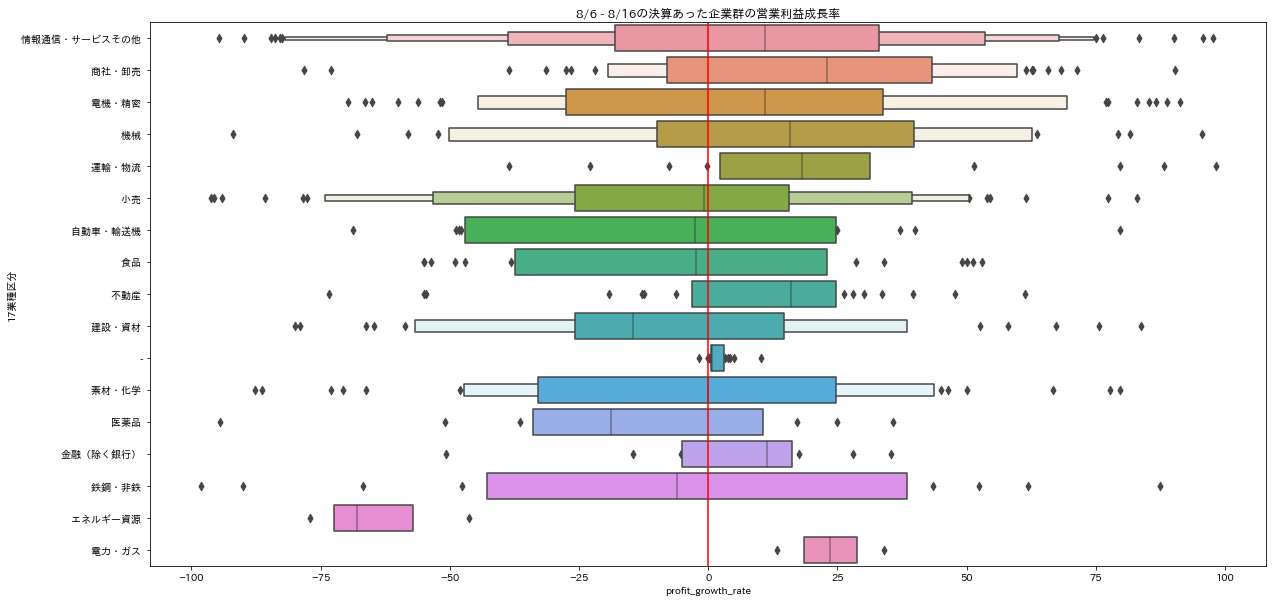

In [41]:
conditions = (latest_df.profit_growth_rate.map(
    lambda x: isinstance(x, str) == False))

# kessan_df[conditions].groupby("33業種区分")["profit_growth_rate"]

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

g = sns.boxenplot(
    data=latest_df[conditions].astype({"profit_growth_rate": float}),
    
    x="profit_growth_rate", y="17業種区分",
    # kind="kde"
)
ax.axvline(0,color="r")
plt.title("8/6 - 8/16の決算あった企業群の営業利益成長率")

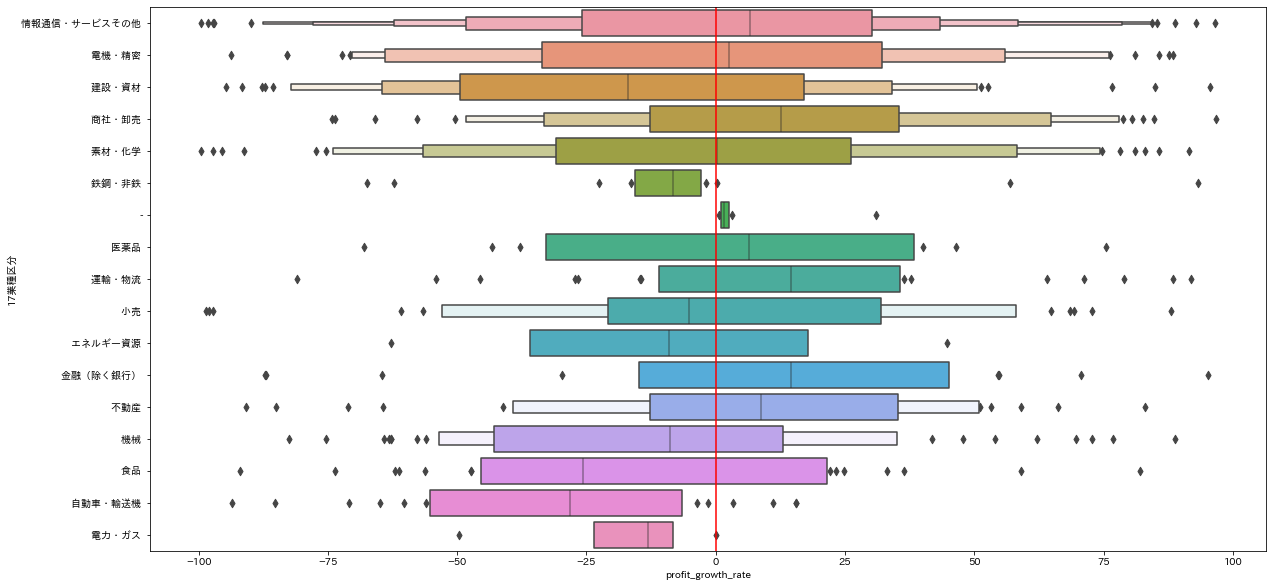

In [67]:
conditions = (
    (kessan_df.profit_growth_rate.map(
    lambda x: isinstance(x, str) == False)) & (kessan_df["release_date"] < pd.to_datetime("2022/09/01"))
              
)

kessan_df[conditions].groupby("33業種区分")["profit_growth_rate"]

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

g = sns.boxenplot(
    data=kessan_df[conditions].astype({"profit_growth_rate": float}),
    
    x="profit_growth_rate", y="17業種区分",
    # kind="kde"
)
ax.axvline(0,color="r")
# plt.title("8/6 - 8/16の決算あった企業群の営業利益成長率")

Text(0.5, 1.0, '8/6 - 8/16の決算あった企業群の営業利益成長率')

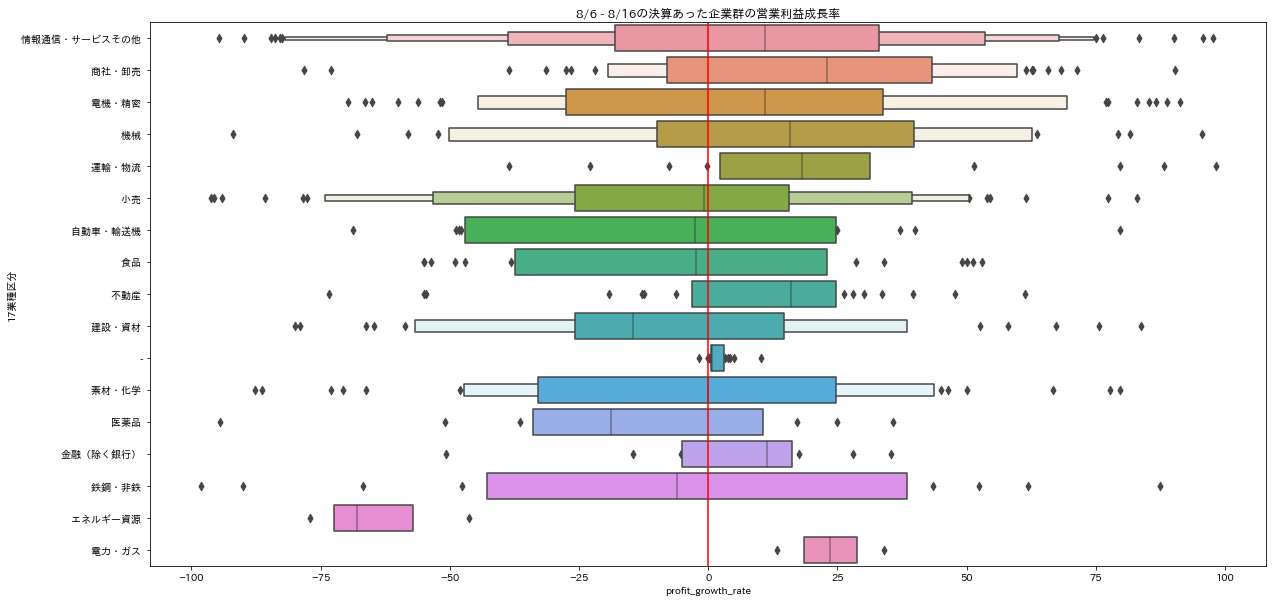

In [68]:
conditions = (
    (kessan_df.profit_growth_rate.map(
    lambda x: isinstance(x, str) == False)) & (kessan_df["release_date"] > pd.to_datetime("2022/09/01"))
              
)

kessan_df[conditions].groupby("33業種区分")["profit_growth_rate"]

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

g = sns.boxenplot(
    data=kessan_df[conditions].astype({"profit_growth_rate": float}),
    
    x="profit_growth_rate", y="17業種区分",
    # kind="kde"
)
ax.axvline(0,color="r")
plt.title("8/6 - 8/16の決算あった企業群の営業利益成長率")

In [84]:
kessan_df.loc[conditions].sort_values("profit_growth_rate", ascending=False)

,index,profit_growth_rate,release_date,duration,33業種区分,17業種区分
code,,,,,,
9115,明治海運,98.2,2022-10-28,22.04-09,海運業,運輸・物流
7373,アイドマ・ホールディングス,97.7,2022-10-14,2022.08,サービス業,情報通信・サービスその他
3791,ＩＧポート,95.8,2022-10-14,22.06-08,情報・通信業,情報通信・サービスその他
6264,マルマエ,95.6,2022-10-07,2022.08,機械,機械
6912,菊水電子工業,91.2,2022-10-27,新 22.04-09,電気機器,電機・精密
2715,エレマテック,90.4,2022-10-28,22.04-09,卸売業,商社・卸売
2379,ディップ,90.2,2022-10-13,連 22.03-08,サービス業,情報通信・サービスその他
6770,アルプスアルパイン,88.7,2022-10-28,22.04-09,電気機器,電機・精密
9384,内外トランスライン,88.2,2022-10-28,22.01-09,倉庫・運輸関連業,運輸・物流


In [78]:
kessan_df[conditions].astype({"profit_growth_rate": float}).groupby("33業種区分")["profit_growth_rate"].describe()

,count,mean,std,min,25%,50%,75%,max
33業種区分,,,,,,,,
-,5.0,1.740000,0.923580,1.0,1.100,1.20,2.300,3.1
その他製品,37.0,41.091892,114.572440,-53.8,-24.800,6.60,43.300,400.0
その他金融業,10.0,13.550000,63.976615,-87.1,-44.425,31.95,54.725,95.2
ガラス・土石製品,14.0,22.857143,91.965878,-87.8,-25.775,4.00,36.750,230.0
ゴム製品,10.0,-19.050000,23.898547,-56.0,-39.525,-8.90,-4.625,15.5
サービス業,159.0,141.065409,537.269049,-99.5,-9.150,25.00,69.050,6000.0
パルプ・紙,10.0,200.120000,571.216896,-97.3,-28.625,0.40,64.625,1800.0
不動産業,41.0,24.929268,115.796399,-90.9,-12.600,8.80,40.500,700.0
保険業,3.0,14.800000,14.752288,0.2,7.350,14.50,22.100,29.7


# 赤転、黒転、赤縮、赤拡

In [35]:
# kessan_df.sort_values("profit")
changed_df = (
    kessan_df[kessan_df.profit_growth_rate.map(lambda x: isinstance(x, str))]
    .groupby(["33業種区分", "profit_growth_rate"])["index"].count().reset_index()
)

In [44]:
changed_df.columns

Index(['33業種区分', 'profit_growth_rate', 'index'], dtype='object')

In [46]:
changed_df_pivot = changed_df.pivot(columns="profit_growth_rate", index="33業種区分")
# .style.background_gradient()


In [53]:
changed_df_pivot.columns = ['赤拡', '赤縮', '赤転', '黒転', '－']

In [55]:
changed_df_pivot[['赤拡', '赤縮', '赤転', '黒転', '－']]

,赤拡,赤縮,赤転,黒転,－
33業種区分,,,,,
その他製品,3.0,1.0,2.0,2.0,3.0
その他金融業,NaN,1.0,1.0,1.0,2.0
ガラス・土石製品,1.0,3.0,1.0,3.0,NaN
ゴム製品,NaN,NaN,1.0,1.0,NaN
サービス業,23.0,24.0,15.0,24.0,18.0
不動産業,2.0,2.0,3.0,7.0,4.0
保険業,NaN,NaN,NaN,NaN,5.0
倉庫・運輸関連業,NaN,2.0,NaN,1.0,NaN
化学,NaN,3.0,6.0,1.0,3.0


In [122]:
kessan_df.groupby("33業種区分").apply(lambda x: "__".join(x["profit"].astype(str))).reset_index()

,33業種区分,0
0,-,2.3__3.1__1.1__1__1.2
1,その他製品,5.8
2,その他金融業,-64.5
3,ガラス・土石製品,赤縮
4,ゴム製品,黒転
5,サービス業,31.9__赤拡__-41.4__黒転__-46.7__－__10.7__赤縮__赤拡__-...
6,不動産業,66.2__10.9__34
7,化学,2.1倍
8,医薬品,75.5__赤縮__-31
9,卸売業,赤縮__18.2__赤縮__63.7__黒転


In [73]:
kessan_df

,index,profit_growth_rate,release_date,duration,33業種区分,17業種区分
code,,,,,,
4396,システムサポート,28.5,2022-08-10,2022.06,情報・通信業,情報通信・サービスその他
6651,日東工業,-83,2022-08-08,22.04-06,電気機器,電機・精密
3900,クラウドワークス,2.0倍,2022-08-15,連 21.10-06,情報・通信業,情報通信・サービスその他
4726,ＳＢテクノロジー,2.9,2022-10-26,22.04-09,情報・通信業,情報通信・サービスその他
3977,None,5.1倍,2022-10-14,22.03-08,NaN,NaN
...,...,...,...,...,...,...
4881,ファンペップ,赤拡,2022-08-12,22.01-06,医薬品,医薬品
4498,サイバートラスト,40.4,2022-10-25,22.04-09,情報・通信業,情報通信・サービスその他
1730,麻生フオームクリート,赤転,2022-10-28,新 22.04-09,建設業,建設・資材


In [77]:
# kessan_df['profit_growth_rate']

In [71]:
for idx, subdf in kessan_df.groupby("index"):
    print(subdf)

            index profit_growth_rate release_date duration 33業種区分  17業種区分
code                                                                     
3076  あい　ホールディングス                4.3   2022-08-19  2022.06    卸売業  商社・卸売 
       index profit_growth_rate release_date  duration      33業種区分     17業種区分
code                                                                         
8737  あかつき本社                -87   2022-08-15  22.04-06  証券、商品先物取引業  金融（除く銀行） 
     index profit_growth_rate release_date  duration 33業種区分 17業種区分
code                                                              
7678  あさくま                 赤縮   2022-08-10  22.04-06    小売業    小売 
              index profit_growth_rate release_date  duration 33業種区分 17業種区分
code                                                                       
4886  あすか製薬ホールディングス               40.1   2022-08-08  22.04-06    医薬品   医薬品 
      index profit_growth_rate release_date  duration 33業種区分 17業種区分
code                                           